Dataset Link - https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r drive/My\ Drive/Colab\ Notebooks/data/images/MURA-v1.1.zip .
!unzip MURA-v1.1.zip

Archive:  MURA-v1.1.zip
   creating: MURA-v1.1/
  inflating: MURA-v1.1/train_labeled_studies.csv  
  inflating: MURA-v1.1/valid_labeled_studies.csv  
  inflating: MURA-v1.1/train_image_paths.csv  
  inflating: MURA-v1.1/valid_image_paths.csv  
   creating: MURA-v1.1/valid/
   creating: MURA-v1.1/valid/XR_ELBOW/
   creating: MURA-v1.1/valid/XR_ELBOW/patient11817/
   creating: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/
 extracting: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image1.png  
  inflating: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image5.png  
  inflating: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image2.png  
 extracting: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image3.png  
 extracting: MURA-v1.1/valid/XR_ELBOW/patient11817/study1_positive/image4.png  
   creating: MURA-v1.1/valid/XR_ELBOW/patient11860/
   creating: MURA-v1.1/valid/XR_ELBOW/patient11860/study1_negative/
  inflating: MURA-v1.1/valid/XR_ELBOW/patient11

In [0]:
!mkdir data
!mv MURA-v1.1 data/
#removing hidden files which causes probelm later
!rm ./data/MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png
!rm ./data/MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image2.png
!rm ./data/MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image3.png
!rm ./data/MURA-v1.1/train/XR_WRIST/patient07840/study2_negative/._image1.png

###Extracting Metadata information

In [0]:
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

pd.set_option('max_colwidth', 800)
%matplotlib inline

###Creating Different functions to explore data at different levels.

In [0]:
def studies_csv(datatype, study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']):
  """
    This function is to create a csv file containing path to studies of patient, count of images and labels.
    @datatype ==> which part of data : train|valid
  """
  data = pd.DataFrame(columns=['path','count','label'])
  study_label = {'positive' : 1, 'negative' : 0}
  study_count = 0
  for study in study_types:
    DATA_DIR = './data/MURA-v1.1/%s/%s/' % (datatype,study)
    patient_list = list(os.walk(DATA_DIR))[0][1]  #list of all patients under that study
    for patient in tqdm(patient_list):
      for study_number in os.listdir(DATA_DIR + patient):
        label = study_label[study_number.split('_')[1]]
        path = DATA_DIR + patient + '/' + study_number + '/'
        data.loc[study_count] = [path, len(os.listdir(path)), label]
        study_count+=1
#  print(data)
  data.to_csv("./data/" + datatype + "_studies.csv", index=None, header=False)
      

In [0]:
def images_csv(datatype, study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']):
  """
    This function is to create a csv file containing path to images of x-rays and labels.
    @datatype ==> which part of data : train|valid
  """
  data = pd.DataFrame(columns=['path','label'])
  study_label = {'positive' : 1, 'negative' : 0}
  image_count = 0
  for study in study_types:
    DATA_DIR = './data/MURA-v1.1/%s/%s/' % (datatype,study)
    patient_list = list(os.walk(DATA_DIR))[0][1]  #list of all patients under that study
    for patient in tqdm(patient_list):
      for study_number in os.listdir(DATA_DIR + patient):
        label = study_label[study_number.split('_')[1]]
        path = DATA_DIR + patient + '/' + study_number + '/'
        for image in os.listdir(path):
          i_path = path + image
          data.loc[image_count] = [i_path,label]
          image_count+=1
#  print(data)
  data.to_csv("./data/" + datatype + "_images_" + study + ".csv", index=None, header=False)

In [0]:
def studytypes_csv(datatype, study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']):
  """
    This function is to create a csv file containing study_types, studies of patient, patient_number and labels.
    @datatype ==> which part of data : train|valid
  """
  data = pd.DataFrame(columns=['studyType', 'patient', 'study','label'])
  study_label = {'positive' : 1, 'negative' : 0}
  count = 0
  for study in study_types:
    DATA_DIR = './data/MURA-v1.1/%s/%s/' % (datatype,study)
    patient_list = list(os.walk(DATA_DIR))[0][1]  #list of all patients under that study
    for patient in tqdm(patient_list):
      for study_number in os.listdir(DATA_DIR + patient):
        label = study_label[study_number.split('_')[1]]
        path = DATA_DIR + patient + '/' + study_number + '/'
        data.loc[count] = [study, patient, study_number, label]
        count+=1
#  print(data)
  data.to_csv("./data/" + datatype + "_studytypes.csv", index=None, header=False)
      

###Creating metadata csv files.

In [0]:
studies_csv('train')
studies_csv('valid')

images_csv('train')
images_csv('valid')

studytypes_csv('train')
studytypes_csv('valid')

100%|██████████| 207/207 [00:00<00:00, 348.63it/s]


In [0]:
#creating dataframe for matadata
train_df = pd.read_csv("./data/train_studies.csv",names=['path', 'count', 'label'])
valid_df = pd.read_csv("./data/valid_studies.csv",names=['path', 'count', 'label'])

**Total Number of studies**

In [0]:
print(train_df.shape,valid_df.shape)
print("Total studies",train_df.shape[0]+valid_df.shape[0])

(13457, 3) (1199, 3)
Total studies 14656


**Different Types of Study**

In [0]:
!ls data/MURA-v1.1/train/

XR_ELBOW  XR_FINGER  XR_FOREARM  XR_HAND  XR_HUMERUS  XR_SHOULDER  XR_WRIST


###Finding Number of patients in each study_types and Plotting them

In [0]:
#creating dictionary for each datatype and study_type

datatype = ['train','valid']
studytypes = list(os.walk('data/MURA-v1.1/train/'))[0][1]
patient_count = {}
for dtype in datatype:
  patient_count[dtype] = {}
  for study in studytypes:
    count = len(list(os.walk('data/MURA-v1.1/%s/%s/' % (dtype,study)))[0][1])
    patient_count[dtype][study] = count

In [0]:
print(studytypes)
print(patient_count)

['XR_FINGER', 'XR_FOREARM', 'XR_WRIST', 'XR_ELBOW', 'XR_HAND', 'XR_SHOULDER', 'XR_HUMERUS']
{'train': {'XR_FINGER': 1865, 'XR_FOREARM': 865, 'XR_WRIST': 3267, 'XR_ELBOW': 1711, 'XR_HAND': 1945, 'XR_SHOULDER': 2694, 'XR_HUMERUS': 587}, 'valid': {'XR_FINGER': 166, 'XR_FOREARM': 129, 'XR_WRIST': 207, 'XR_ELBOW': 152, 'XR_HAND': 159, 'XR_SHOULDER': 173, 'XR_HUMERUS': 132}}


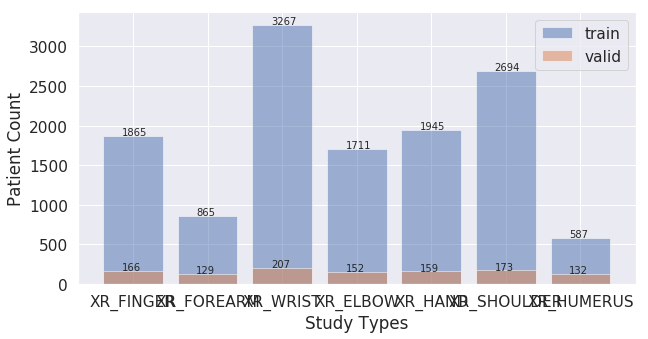

In [0]:
#plotting patient count per study

fig, ax = plt.subplots(figsize=(10, 5))
for i,dtype in enumerate(datatype):
  counts = patient_count[dtype].values()
  max_count = max(counts)
  for j,count in enumerate(counts):
    if count == max_count:
      ax.text(j-0.15,count+10,str(count))
    else:
      ax.text(j-0.15,count+10,str(count))
  x = np.arange(len(studytypes))
  plt.bar(x, counts, alpha=0.5)
  plt.xticks(x, studytypes)
  
plt.xlabel("Study Types")
plt.ylabel("Patient Count")
plt.legend(['train', 'valid'])
plt.show()

Initial data reflects imbalance distribution between studyTypes in the dataset. So there are chances of different accuracies , recall per studyType

###Plotting Number of studies per label in each studyTypes

In [0]:
train_df = pd.read_csv('data/train_studytypes.csv', names = ['studyType', 'patient', 'study','label'])
valid_df = pd.read_csv('data/valid_studytypes.csv', names = ['studyType', 'patient', 'study','label'])
labels = ['positive','negative']
train = train_df.groupby('studyType')['label'].apply(list).to_dict()
for i,dtype in enumerate(train):
  labellist = train[dtype]
  train[dtype] = defaultdict(lambda:0)
  for label in labellist:
    train[dtype][label] +=1

print(train)

valid = valid_df.groupby('studyType')['label'].apply(list).to_dict()
for i,dtype in enumerate(valid):
  labellist = valid[dtype]
  valid[dtype] = defaultdict(lambda:0)
  for label in labellist:
    valid[dtype][label] +=1

print(valid)

{'XR_ELBOW': defaultdict(<function <lambda> at 0x7f26080b2d90>, {1: 660, 0: 1094}), 'XR_FINGER': defaultdict(<function <lambda> at 0x7f2608b25048>, {0: 1280, 1: 655}), 'XR_FOREARM': defaultdict(<function <lambda> at 0x7f2608b250d0>, {0: 590, 1: 287}), 'XR_HAND': defaultdict(<function <lambda> at 0x7f2608b25378>, {1: 521, 0: 1497}), 'XR_HUMERUS': defaultdict(<function <lambda> at 0x7f2608b25a60>, {0: 321, 1: 271}), 'XR_SHOULDER': defaultdict(<function <lambda> at 0x7f2608b25d90>, {0: 1364, 1: 1457}), 'XR_WRIST': defaultdict(<function <lambda> at 0x7f2608b25510>, {1: 1326, 0: 2134})}
{'XR_ELBOW': defaultdict(<function <lambda> at 0x7f2608cbc268>, {1: 66, 0: 92}), 'XR_FINGER': defaultdict(<function <lambda> at 0x7f2608cbc1e0>, {0: 92, 1: 83}), 'XR_FOREARM': defaultdict(<function <lambda> at 0x7f2608cbc158>, {0: 69, 1: 64}), 'XR_HAND': defaultdict(<function <lambda> at 0x7f2608cbc048>, {1: 66, 0: 101}), 'XR_HUMERUS': defaultdict(<function <lambda> at 0x7f2608cbc8c8>, {0: 68, 1: 67}), 'XR_S

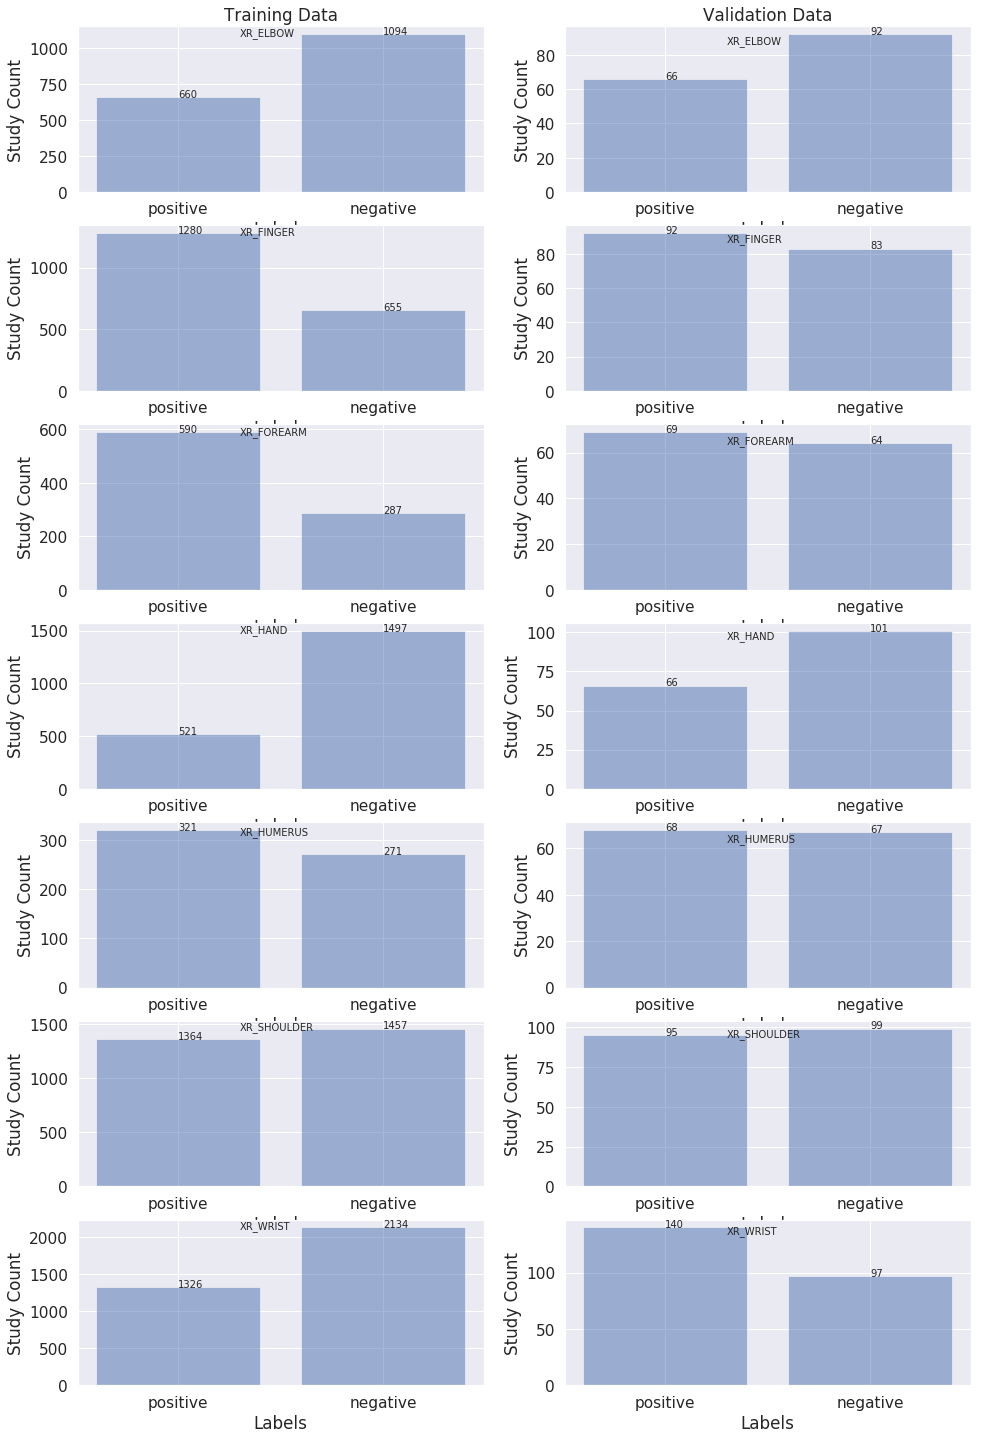

In [0]:
#plot graphs between number of studies and lables
fig = plt.figure(figsize=(16, 25))
gs = fig.add_gridspec(7, 2)
for i,study in enumerate(train):
  ax = fig.add_subplot(gs[i,0])
  if i==0 :
    ax.set_title("Training Data")
  counts = train[study]
  max_count = max(counts.values())
  for j,count in enumerate(counts.values()):
    if count == max_count:
      ax.text(j,count,str(count))
    else:
      ax.text(j,count,str(count))
  ax.text(j-0.7, max_count-10, study)
  x = np.arange(len(counts))
  plt.bar(x, counts.values(), align='center', alpha=0.5)
  plt.xticks(x,labels)
  plt.xlabel("Labels")
  plt.ylabel("Study Count")

for i,study in enumerate(valid):
  ax = fig.add_subplot(gs[i,1])
  if i==0 :
    ax.set_title("Validation Data")
  counts = valid[study]
  max_count = max(counts.values())
  for j,count in enumerate(counts.values()):
    if count == max_count:
      ax.text(j,count,str(count))
    else:
      ax.text(j,count,str(count))
  ax.text(j-0.7, max_count-5, study)
  x = np.arange(len(counts))
  plt.bar(x, counts.values(), align='center', alpha=0.5)
  plt.xticks(x,labels)
  plt.xlabel("Labels")
  plt.ylabel("Study Count")

plt.show()

In [0]:
!ls data

MURA-v1.1	  train_studies.csv	valid_images.csv   valid_studytypes.csv
train_images.csv  train_studytypes.csv	valid_studies.csv


###FOR XR_ELBOWS

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

Using TensorFlow backend.


In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_ELBOW"
study_types = ['XR_ELBOW']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df)
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 152/152 [00:00<00:00, 174.27it/s]
4931it [00:18, 263.27it/s]
465it [00:17, 23.35it/s]


**Creating Model For XR_ELBOWS**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    class_weight = weights,
    callbacks = callbacks_list
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
616/616 [==============================] - 640s 1s/step - loss: 0.5666 - acc: 0.7177 - mean_squared_error: 0.1886 - val_loss: 0.6412 - val_acc: 0.6897 - val_mean_squared_error: 0.2189
Epoch 2/10
616/616 [==============================] - 585s 949ms/step - loss: 0.4893 - acc: 0.7822 - mean_squared_error: 0.1567 - val_loss: 0.7585 - val_acc: 0.5690 - val_mean_squared_error: 0.2551

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/10
616/616 [==============================] - 585s 949ms/step - loss: 0.4224 - acc: 0.8247 - mean_squared_error: 0.1307 - val_loss: 0.3005 - val_acc: 0.8966 - val_mean_squared_error: 0.0892
Epoch 4/10
616/616 [==============================] - 585s 949ms/step - loss: 0.3986 - acc: 0.8373 - mean_squared_error: 0.1224 - val_loss: 0.4539 - val_acc: 0.7759 - val_mean_squared_error: 0.1466

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 5/10
616/

**Save the model**

In [0]:
model.save("XR_ELBOW_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_ELBOW_ARCH.png', show_shapes=True)

**Evaluating Model**

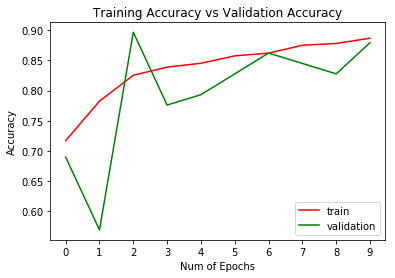

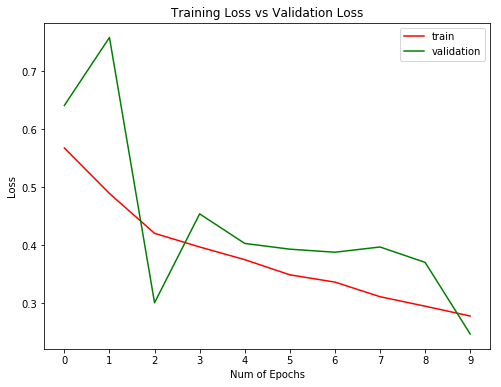

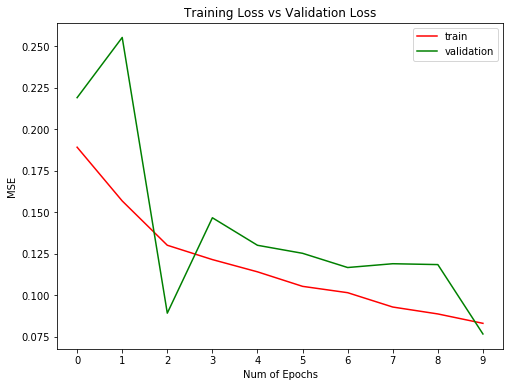

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, cohen_kappa_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       235
           1       0.90      0.77      0.83       230

   micro avg       0.84      0.84      0.84       465
   macro avg       0.85      0.84      0.84       465
weighted avg       0.85      0.84      0.84       465



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.8408602150537634

**Confusion Matrix**

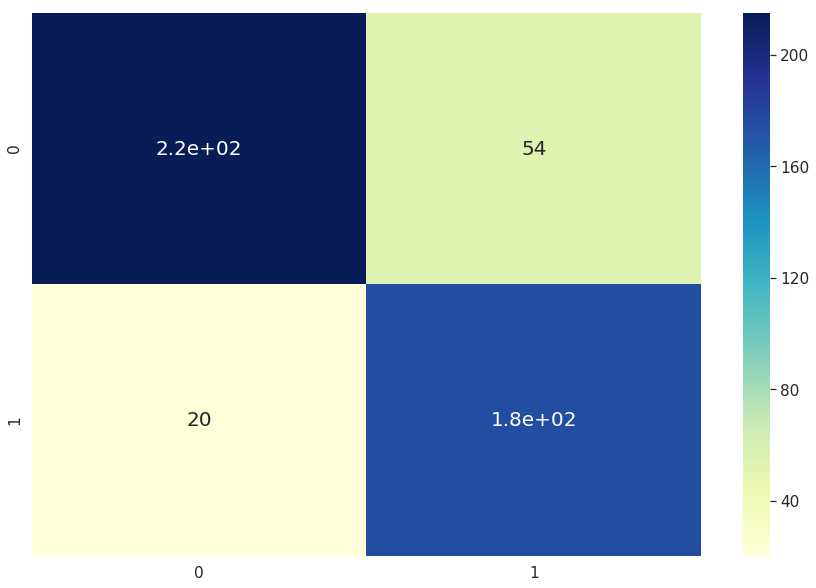

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

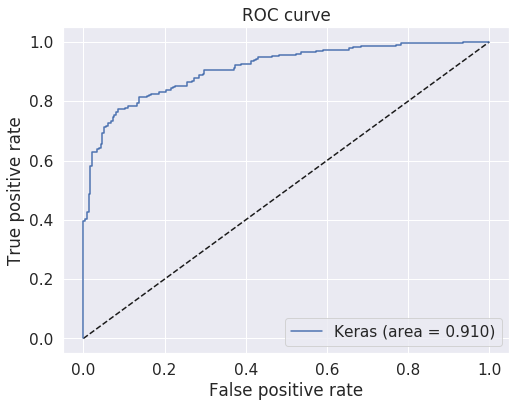

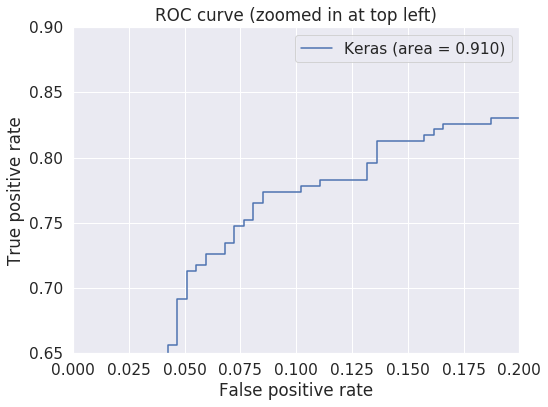

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_HAND

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

Using TensorFlow backend.


In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_HAND"
study_types = ['XR_HAND']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df)
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 159/159 [00:00<00:00, 178.81it/s]
5543it [00:23, 239.25it/s]
460it [00:14, 31.30it/s]


**Creating Model For XR_HAND**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

Instructions for updating:
Colocations handled automatically by placer.
74842112/74836368 [==============================] - 2s 0us/step


In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    callbacks = callbacks_list,
    class_weight = weights
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
692/692 [==============================] - 691s 998ms/step - loss: 0.6912 - acc: 0.5542 - mean_squared_error: 0.2451 - val_loss: 0.7470 - val_acc: 0.6140 - val_mean_squared_error: 0.2584
Epoch 2/10
692/692 [==============================] - 643s 930ms/step - loss: 0.6528 - acc: 0.6335 - mean_squared_error: 0.2279 - val_loss: 0.6621 - val_acc: 0.5789 - val_mean_squared_error: 0.2303
Epoch 3/10
692/692 [==============================] - 644s 930ms/step - loss: 0.6244 - acc: 0.6806 - mean_squared_error: 0.2134 - val_loss: 0.5640 - val_acc: 0.6842 - val_mean_squared_error: 0.1970
Epoch 4/10
692/692 [==============================] - 644s 931ms/step - loss: 0.6096 - acc: 0.6932 - mean_squared_error: 0.2066 - val_loss: 0.8666 - val_acc: 0.7368 - val_mean_squared_error: 0.2063

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
692/692 [==============================] - 644s 930ms/step - loss: 

**Save the model**

In [0]:
model.save("XR_HAND_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_HAND', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_HAND_ARCH.png', show_shapes=True)

**Evaluating Model**

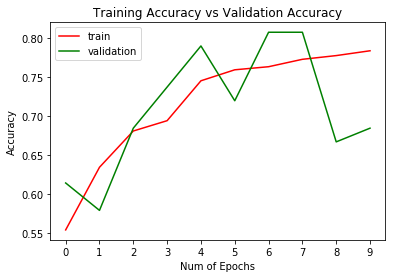

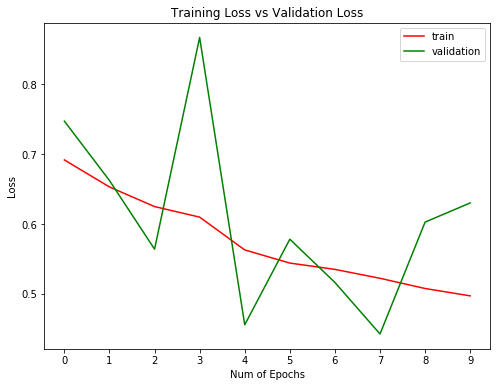

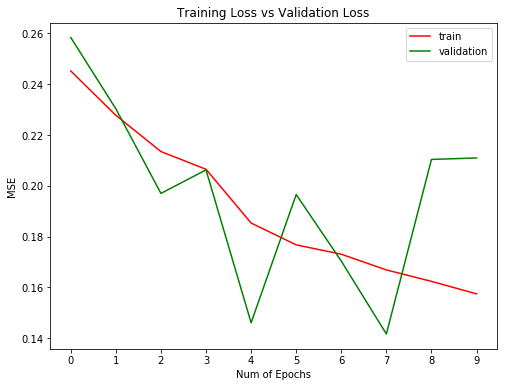

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
#model = load_model("XR_HAND_DenseNet201.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       271
           1       0.72      0.66      0.69       189

   micro avg       0.76      0.76      0.76       460
   macro avg       0.75      0.74      0.74       460
weighted avg       0.75      0.76      0.75       460



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.7565217391304347

**Confusion Matrix**

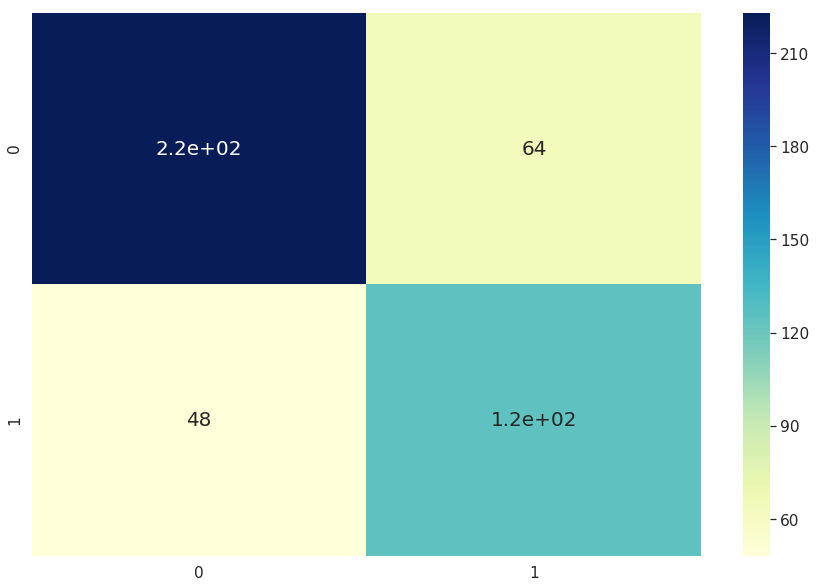

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

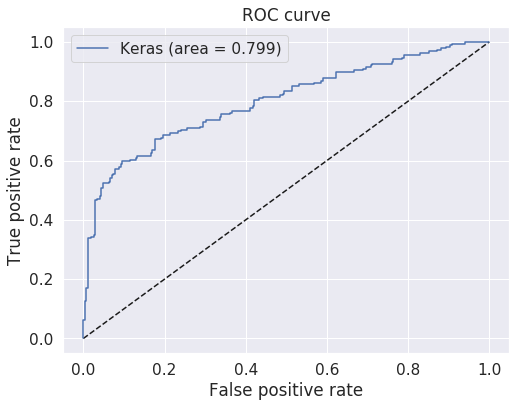

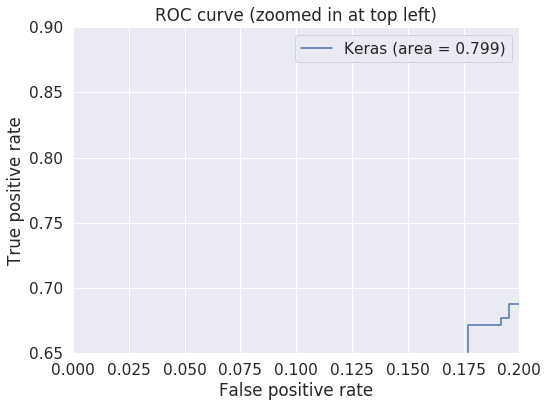

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_FINGER

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

Using TensorFlow backend.


In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_FINGER"
study_types = ['XR_FINGER']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**o Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df)
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 166/166 [00:00<00:00, 184.03it/s]
5106it [00:18, 270.20it/s]
461it [00:08, 55.49it/s]


**Creating Model For XR_FINGER**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    callbacks = callbacks_list,
    class_weight = weights
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
638/638 [==============================] - 633s 993ms/step - loss: 0.5961 - acc: 0.6751 - mean_squared_error: 0.2028 - val_loss: 3.2635 - val_acc: 0.4737 - val_mean_squared_error: 0.3726
Epoch 2/10
638/638 [==============================] - 587s 920ms/step - loss: 0.5386 - acc: 0.7268 - mean_squared_error: 0.1789 - val_loss: 0.7745 - val_acc: 0.7193 - val_mean_squared_error: 0.1989
Epoch 3/10
638/638 [==============================] - 588s 921ms/step - loss: 0.5107 - acc: 0.7515 - mean_squared_error: 0.1674 - val_loss: 0.6121 - val_acc: 0.7544 - val_mean_squared_error: 0.1990
Epoch 4/10
638/638 [==============================] - 587s 919ms/step - loss: 0.4905 - acc: 0.7646 - mean_squared_error: 0.1598 - val_loss: 0.5900 - val_acc: 0.7544 - val_mean_squared_error: 0.1901
Epoch 5/10
638/638 [==============================] - 586s 918ms/step - loss: 0.4686 - acc: 0.7823 - mean_squared_error: 0.1506 - val_loss: 0.4288 - val_acc: 0.

**Save the model**

In [0]:
model.save("XR_FINGER_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_FINGER', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_FINGER_ARCH.png', show_shapes=True)

**Evaluating Model**

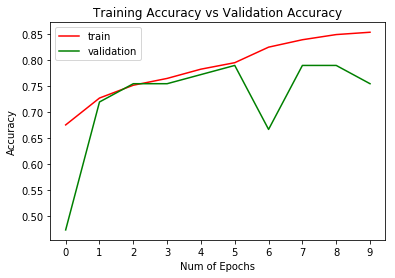

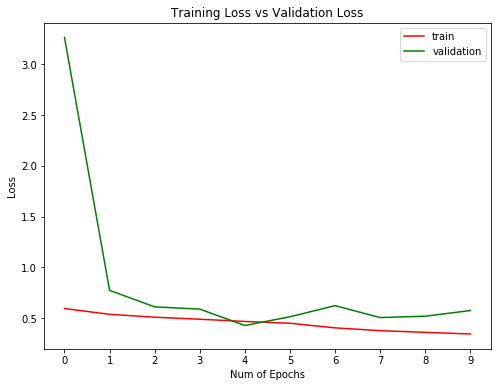

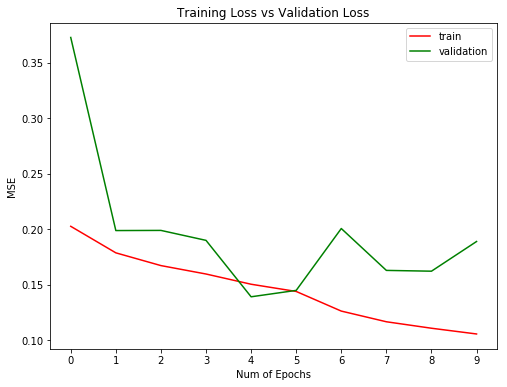

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.85      0.78       214
           1       0.85      0.71      0.77       247

   micro avg       0.78      0.78      0.78       461
   macro avg       0.78      0.78      0.78       461
weighted avg       0.79      0.78      0.78       461



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.7765726681127982

**Confusion Matrix**

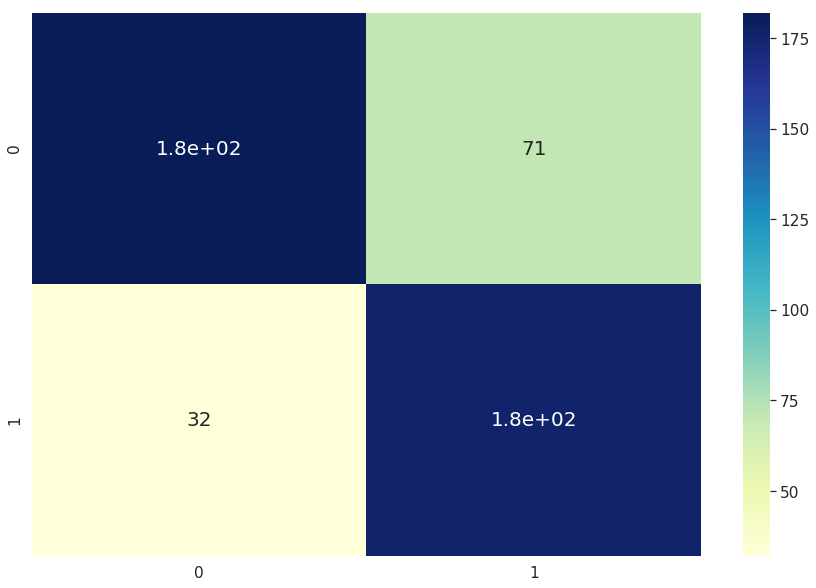

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

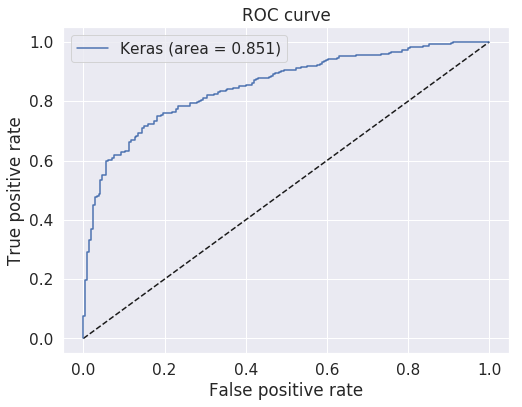

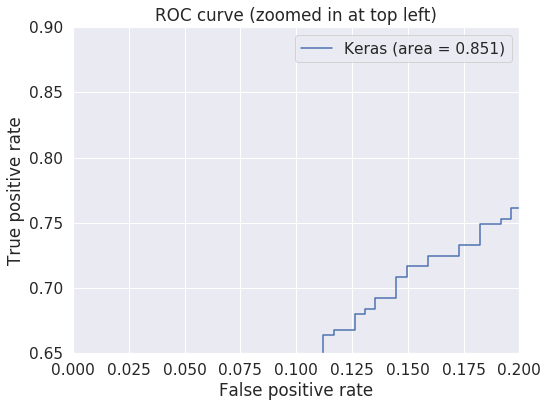

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_HUMERUS

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_HUMERUS"
study_types = ['XR_HUMERUS']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df)
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 132/132 [00:00<00:00, 231.93it/s]
1272it [00:07, 160.62it/s]
288it [00:01, 157.09it/s]


**Creating Model For XR_HUMERUS**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    callbacks = callbacks_list,
    class_weight = weights
)

Epoch 1/10
159/159 [==============================] - 200s 1s/step - loss: 0.5845 - acc: 0.7061 - mean_squared_error: 0.1964 - val_loss: 1.0084 - val_acc: 0.6944 - val_mean_squared_error: 0.2375
Epoch 2/10
159/159 [==============================] - 147s 925ms/step - loss: 0.4685 - acc: 0.7823 - mean_squared_error: 0.1518 - val_loss: 0.9862 - val_acc: 0.5833 - val_mean_squared_error: 0.3157
Epoch 3/10
159/159 [==============================] - 147s 924ms/step - loss: 0.4436 - acc: 0.7990 - mean_squared_error: 0.1419 - val_loss: 0.6830 - val_acc: 0.7222 - val_mean_squared_error: 0.2009
Epoch 4/10
159/159 [==============================] - 148s 932ms/step - loss: 0.3959 - acc: 0.8244 - mean_squared_error: 0.1239 - val_loss: 0.5567 - val_acc: 0.8056 - val_mean_squared_error: 0.1820
Epoch 5/10
159/159 [==============================] - 148s 934ms/step - loss: 0.3711 - acc: 0.8448 - mean_squared_error: 0.1154 - val_loss: 0.3075 - val_acc: 0.8889 - val_mean_squared_error: 0.0936
Epoch 6/10
15

**Save the model**

In [0]:
model.save("XR_HUMERUS_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_HUMERUS', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_HUMERUS_ARCH.png', show_shapes=True)

**Evaluating Model**

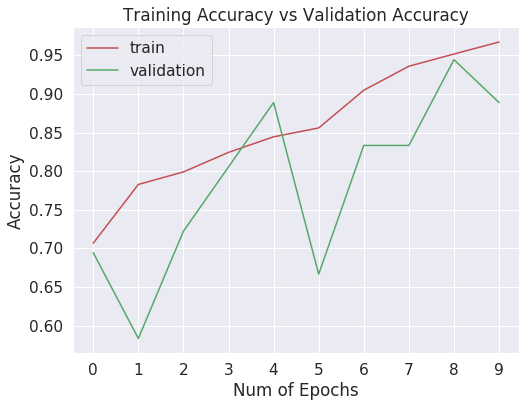

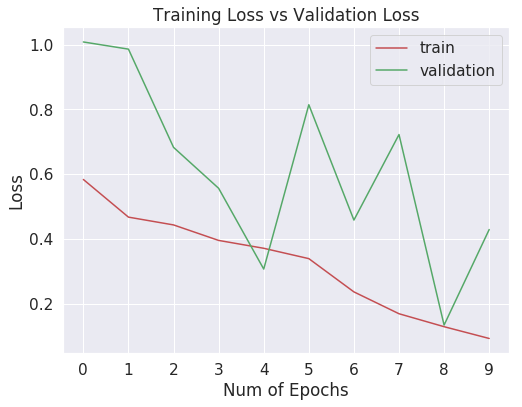

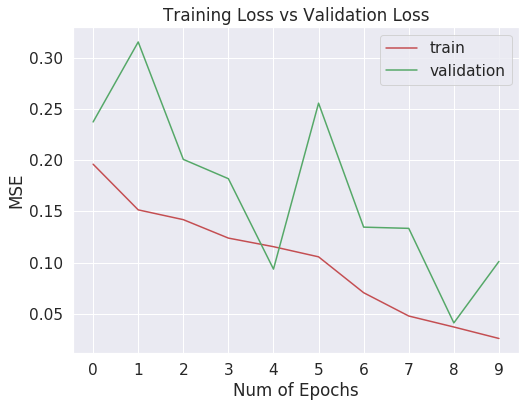

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.85      0.86      0.85       140

   micro avg       0.86      0.86      0.86       288
   macro avg       0.86      0.86      0.86       288
weighted avg       0.86      0.86      0.86       288



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.8576388888888888

**Confusion Matrix**

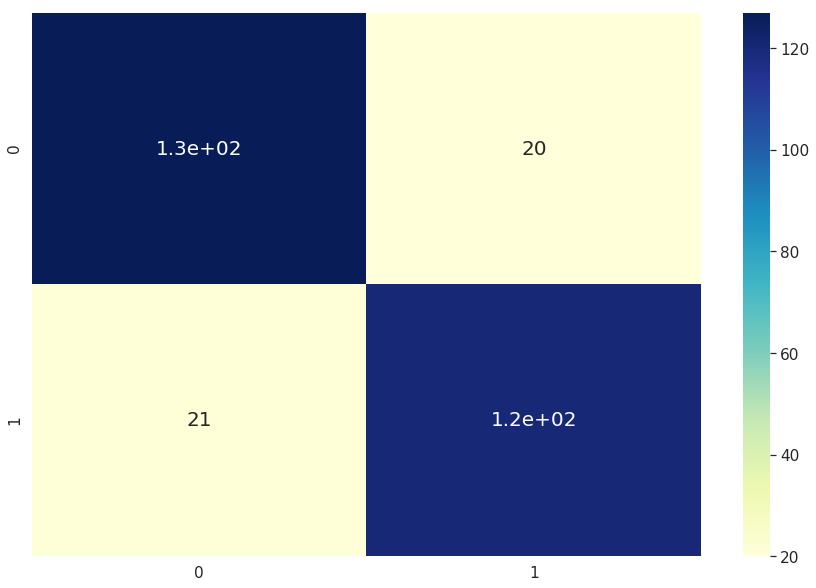

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

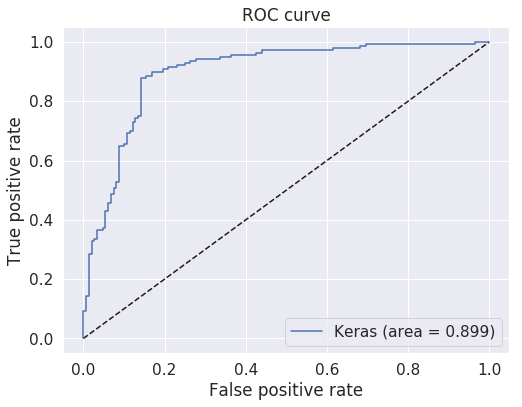

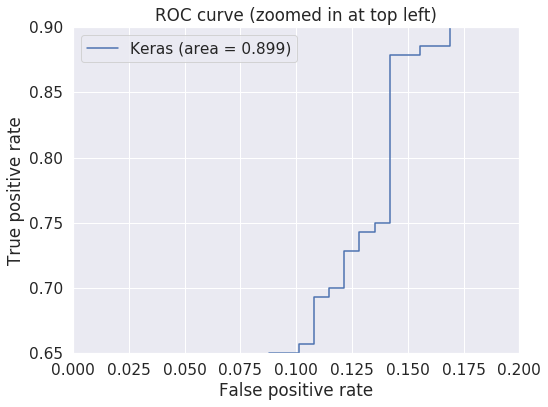

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_FOREARM

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_FOREARM"
study_types = ['XR_FOREARM']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df)
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 129/129 [00:00<00:00, 217.23it/s]
1825it [00:12, 150.48it/s]
301it [00:01, 154.14it/s]


**Creating Model For XR_FOREARM**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1

In [0]:
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

In [0]:
#model = load_model("densenet_mura_rs_v3_xr_elbow.h5")

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    class_weight=weights,
    callbacks = callbacks_list
)

Epoch 1/10
228/228 [==============================] - 305s 1s/step - loss: 0.5680 - acc: 0.7515 - mean_squared_error: 0.1812 - val_loss: 0.6816 - val_acc: 0.7027 - val_mean_squared_error: 0.2125
Epoch 2/10
228/228 [==============================] - 214s 940ms/step - loss: 0.5024 - acc: 0.7799 - mean_squared_error: 0.1588 - val_loss: 1.7210 - val_acc: 0.6757 - val_mean_squared_error: 0.2863

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 3/10
228/228 [==============================] - 214s 938ms/step - loss: 0.4307 - acc: 0.8286 - mean_squared_error: 0.1279 - val_loss: 0.5089 - val_acc: 0.7568 - val_mean_squared_error: 0.1730
Epoch 4/10
228/228 [==============================] - 214s 940ms/step - loss: 0.3817 - acc: 0.8569 - mean_squared_error: 0.1142 - val_loss: 0.6750 - val_acc: 0.6486 - val_mean_squared_error: 0.2360

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0001.
Epoch 5/10
228/228 [==============================] - 215s 945m

**Save the model**

In [0]:
model.save("XR_FOREARM_W_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_FOREARMW', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_FOREARM_ARCH.png', show_shapes=True)

**Evaluating Model**

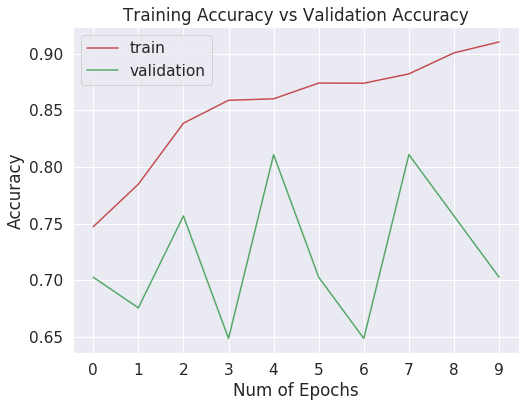

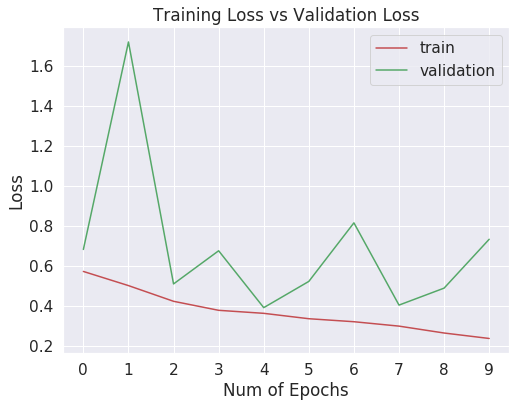

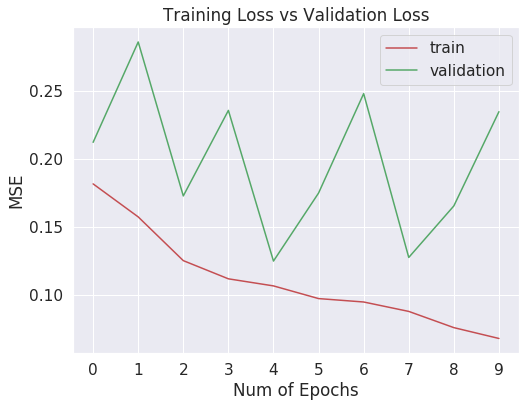

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       150
           1       0.90      0.61      0.73       151

   micro avg       0.77      0.77      0.77       301
   macro avg       0.80      0.77      0.76       301
weighted avg       0.80      0.77      0.76       301



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.770764119601329

**Confusion Matrix**

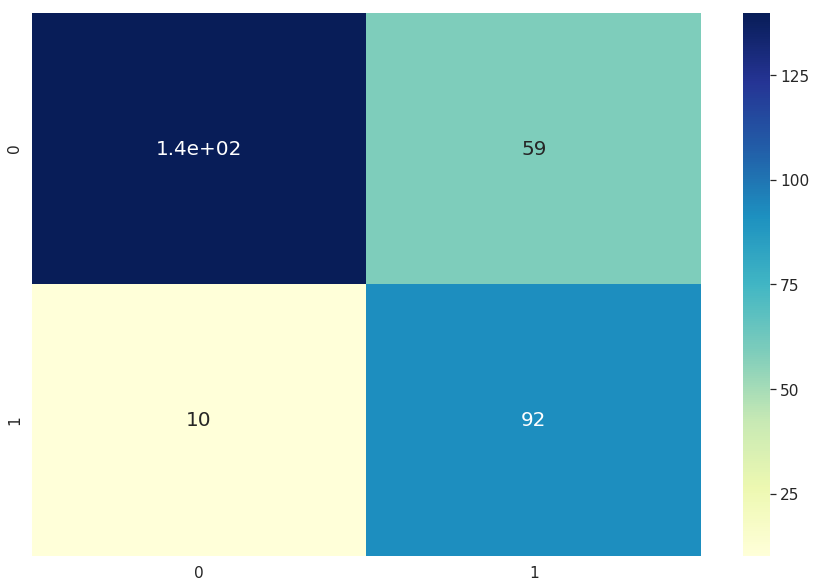

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

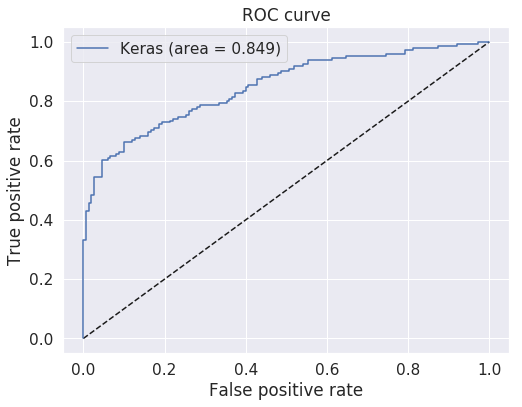

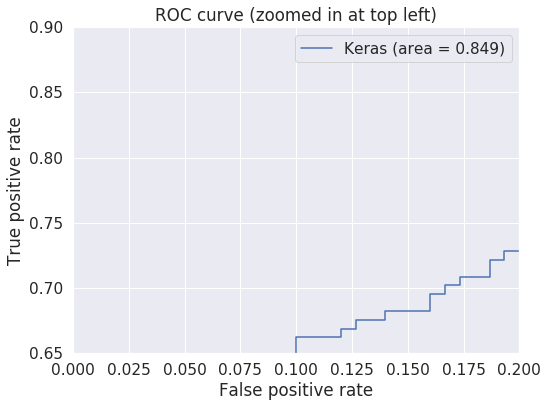

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_WRIST

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet121, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_WRIST"
study_types = ['XR_WRIST']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df[:6000])
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 207/207 [00:01<00:00, 160.42it/s]
6000it [00:24, 244.81it/s]
659it [00:25, 25.39it/s]


**Creating Model For XR_WRIST**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

Instructions for updating:
Colocations handled automatically by placer.
74842112/74836368 [==============================] - 1s 0us/step


In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    callbacks = callbacks_list,
    class_weight = weights
    
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
750/750 [==============================] - 783s 1s/step - loss: 0.5540 - acc: 0.7324 - mean_squared_error: 0.1829 - val_loss: 0.7748 - val_acc: 0.6098 - val_mean_squared_error: 0.2638
Epoch 2/10
750/750 [==============================] - 726s 967ms/step - loss: 0.4832 - acc: 0.7817 - mean_squared_error: 0.1549 - val_loss: 0.5480 - val_acc: 0.7073 - val_mean_squared_error: 0.1890
Epoch 3/10
750/750 [==============================] - 726s 968ms/step - loss: 0.4499 - acc: 0.8000 - mean_squared_error: 0.1420 - val_loss: 0.6119 - val_acc: 0.7073 - val_mean_squared_error: 0.2047

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/10
750/750 [==============================] - 727s 969ms/step - loss: 0.3709 - acc: 0.8464 - mean_squared_error: 0.1132 - val_loss: 0.4303 - val_acc: 0.8293 - val_mean_squared_error: 0.1365
Epoch 5/10
750/750 [==============================] - 726s 967ms/step - loss: 0.3

**Save the model**

In [0]:
model.save("XR_WRIST_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_WRIST', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_WRIST_ARCH.png', show_shapes=True)

**Evaluating Model**

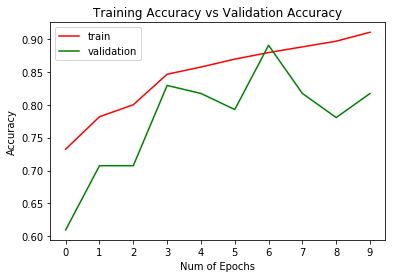

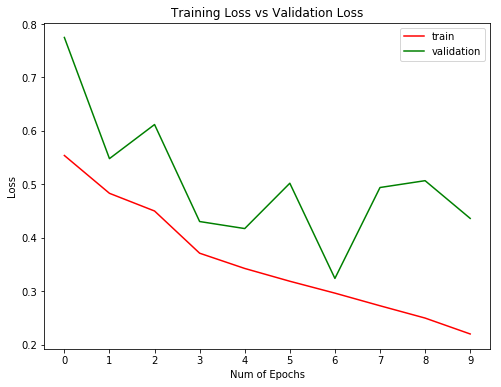

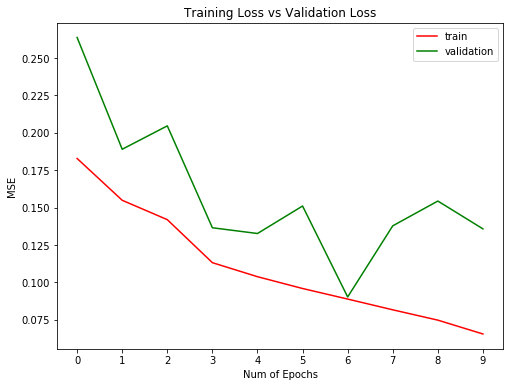

In [0]:
#Metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       364
           1       0.86      0.74      0.79       295

   micro avg       0.83      0.83      0.83       659
   macro avg       0.83      0.82      0.82       659
weighted avg       0.83      0.83      0.83       659



In [0]:
cohen_kappa_score(valid_dict['labels'], pred)

0.6454012517582199

In [0]:
accuracy_score(valid_dict['labels'], pred)

0.8270106221547799

**Confusion Matrix**

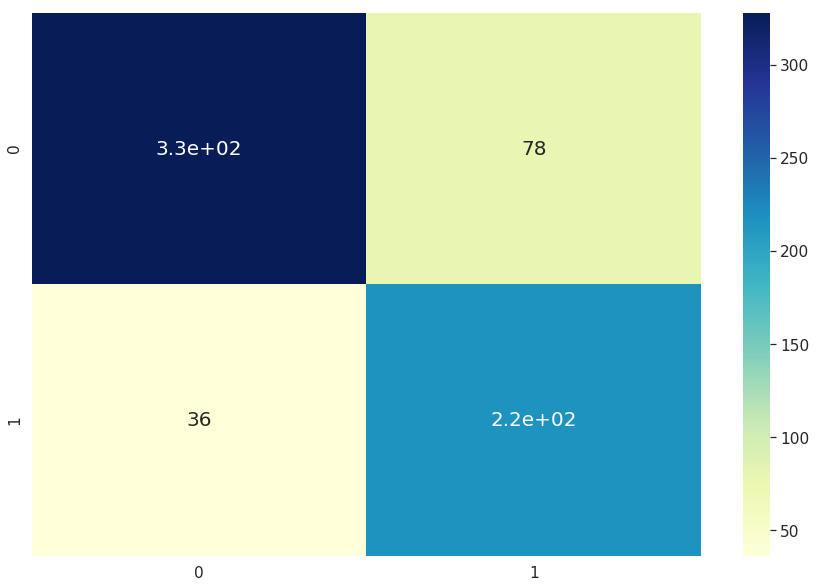

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

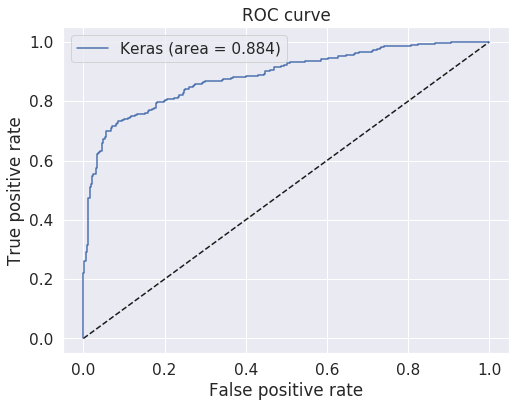

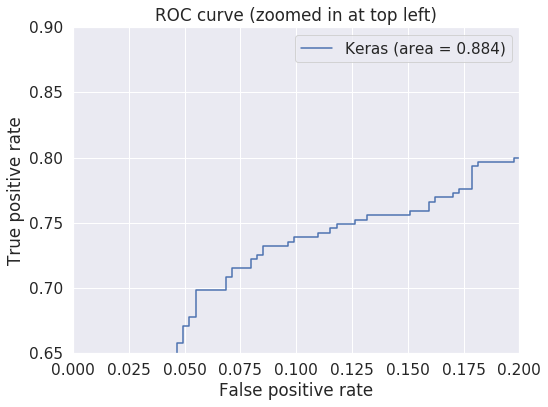

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###FOR XR_SHOULDER

In [0]:
import cv2
from keras.applications.densenet import DenseNet201, DenseNet169, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import random
from keras.optimizers import Adam
import keras.backend as K
from sklearn.utils import class_weight

In [0]:
image_width = 224
image_height = 224

BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
studyType = "XR_SHOULDER"
study_types = ['XR_SHOULDER']

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    #print(image.shape)
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

**To Augment and Normalize Data**

In [0]:
train_dir = BASE_DIR + DATA_DIR + "train/" + studyType
valid_dir = BASE_DIR + DATA_DIR + "valid/" + studyType

train_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('train', study_types)
images_csv('valid', study_types)

train_df = pd.read_csv('data/train_images.csv', names=['path','label'])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['train'] = train_df
data_dict['valid'] = valid_df

train_dict = ImageArray(train_df[:6000])
valid_dict = ImageArray(valid_df)

train_datagen.fit(train_dict['images'],augment=True)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)

train_generator = train_datagen.flow(
    x = train_dict['images'],
    y = train_dict['labels']
)

100%|██████████| 173/173 [00:01<00:00, 133.87it/s]
6000it [00:28, 207.65it/s]
563it [00:22, 24.96it/s]


**Creating Model For XR_SHOULDER**

**Model Parameters**

In [0]:
train_samples_count = len(train_dict['images'])
valid_samples_count = len(valid_dict['images'])
epochs = 10
batch_size = 8
steps_per_epoch = train_samples_count // batch_size
classes = 1
weights = class_weight.compute_class_weight('balanced', np.unique([0,1]), train_dict["labels"])
weights = {0: weights[0], 1: weights[1]}

In [0]:
def build_model():
  base_model = DenseNet201(
      input_shape = (None, None, 3),
      weights = 'imagenet',
      include_top = False,
      pooling = 'avg'
  )
  
  x = base_model.output
  predictions = Dense(classes, activation='sigmoid')(x)
  model = Model(inputs=base_model.input, outputs=predictions)
  return model

**Building and Compiling Model**

In [0]:
model = build_model()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc','mse'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#callbacks for early stopping incase of reduced learning rate, loss unimprovement
early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, verbose=1, min_lr=0.0001)
callbacks_list = [early_stop, reduce_lr]

**Training The Model**

In [0]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    workers = 0,
    use_multiprocessing = False,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = valid_samples_count // batch_size,
    callbacks = callbacks_list,
    class_weight = weights
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
750/750 [==============================] - 788s 1s/step - loss: 0.6469 - acc: 0.6420 - mean_squared_error: 0.2241 - val_loss: 0.7559 - val_acc: 0.6714 - val_mean_squared_error: 0.2337
Epoch 2/10
750/750 [==============================] - 728s 971ms/step - loss: 0.6044 - acc: 0.6839 - mean_squared_error: 0.2071 - val_loss: 0.5418 - val_acc: 0.7714 - val_mean_squared_error: 0.1749
Epoch 3/10
750/750 [==============================] - 729s 972ms/step - loss: 0.5802 - acc: 0.7051 - mean_squared_error: 0.1965 - val_loss: 0.5292 - val_acc: 0.7000 - val_mean_squared_error: 0.1817
Epoch 4/10
750/750 [==============================] - 727s 970ms/step - loss: 0.5590 - acc: 0.7254 - mean_squared_error: 0.1871 - val_loss: 2.0455 - val_acc: 0.5143 - val_mean_squared_error: 0.4276

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 5/10
750/750 [==============================] - 728s 971ms/step - loss: 0.4

**Save the model**

In [0]:
model.save("XR_SHOULDER_DenseNet201.h5")

In [0]:
import pickle
with open('trainHistoryDict_SHOULDER', 'wb') as file_pi:
  pickle.dump(model_history.history, file_pi)

**Visualising the model**

In [0]:
from keras.utils import plot_model 
from keras.utils.vis_utils import *
import keras
import importlib
importlib.reload(keras.utils.vis_utils)
import pydot
plot_model(model, to_file='XR_SHOULDER_ARCH.png', show_shapes=True)

**Evaluating Model**

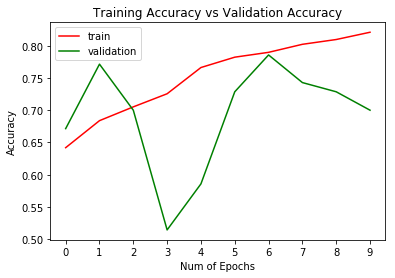

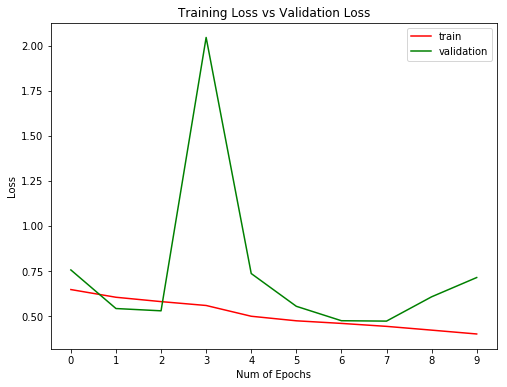

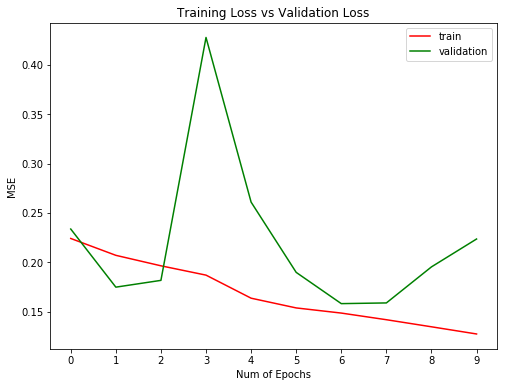

In [0]:
#Now we have trained our model, we can see the metrics during the training proccess
plt.figure(0)
plt.plot(model_history.history['acc'],'r')
plt.plot(model_history.history['val_acc'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
plt.figure(1)
plt.plot(model_history.history['loss'],'r')
plt.plot(model_history.history['val_loss'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.figure(2)
plt.plot(model_history.history['mean_squared_error'],'r')
plt.plot(model_history.history['val_mean_squared_error'],'g')
plt.xticks(np.arange(0, 10, 1))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("MSE")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
plt.show()

In [0]:
pred_batch = model.predict_on_batch(valid_dict['images'])
predictions = []
for p in pred_batch:
    if(p > 0.5):
        predictions+=[1]
    else:
        predictions+=[0]


**Classification Report**

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       285
           1       0.79      0.73      0.76       278

   micro avg       0.77      0.77      0.77       563
   macro avg       0.77      0.77      0.77       563
weighted avg       0.77      0.77      0.77       563



In [0]:
cohen_kappa_score(valid_dict['labels'], pred)

0.5376675552411153

In [0]:
accuracy_score(valid_dict['labels'], pred)

0.7690941385435168

**Confusion Matrix**

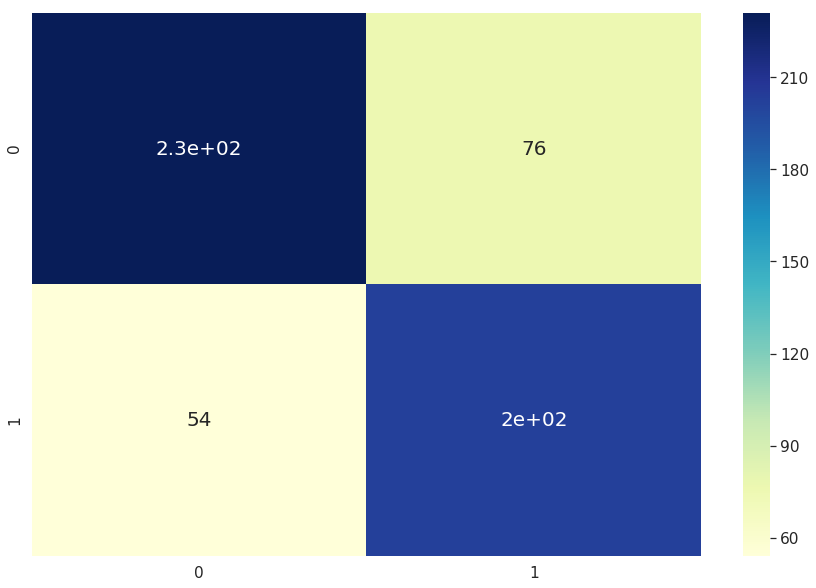

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

**ROC Curve**

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], pred_batch)
auc_keras = auc(fpr_keras, tpr_keras)

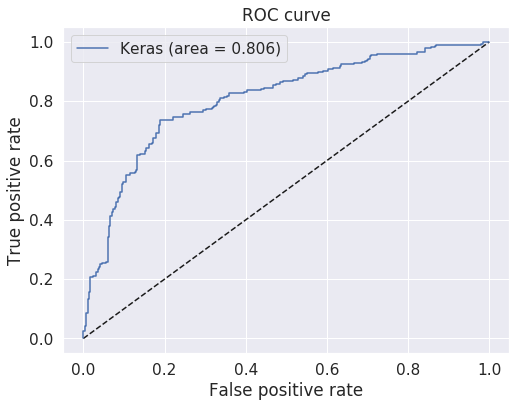

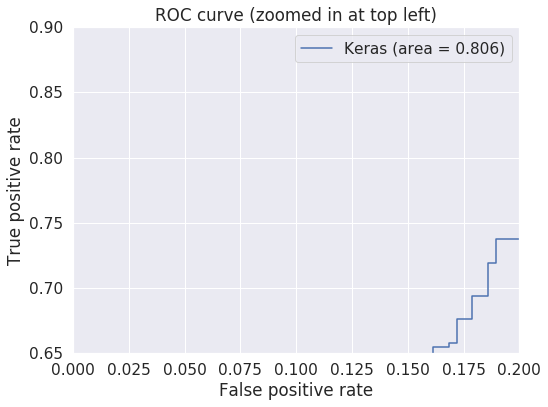

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

###CAM

In [0]:
from keras.models import *
from keras.callbacks import *
import keras.backend as K
import cv2
from PIL import Image
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator, load_img, image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
#Creating a model dictionary so that we can predict output by matching image path to model name
models={}
model_xr_elbow = load_model("XR_ELBOW_DenseNet.h5")
model_xr_elbow.name = 'model_xr_elbow'
model_xr_finger = load_model("XR_FINGER_DenseNet201.h5")
model_xr_finger.name = 'model_xr_finger'
model_xr_forearm = load_model("XR_FOREARM_DenseNet.h5")
model_xr_forearm.name = 'model_xr_forearm'
model_xr_hand = load_model("XR_HAND_DenseNet201.h5")
model_xr_hand.name = 'model_xr_hand'
model_xr_shoulder = load_model("XR_SHOULDER_DenseNet201.h5")
model_xr_shoulder.name = 'model_xr_shoulder'
model_xr_wrist = load_model("XR_WRIST_DenseNet201.h5")
model_xr_wrist.name = 'model_xr_wrist'
model_xr_humerus = load_model("XR_HUMERUS_DenseNet201.h5")
model_xr_humerus.name = 'model_xr_humerus'

models["XR_ELBOW"] = model_xr_elbow
models["XR_FINGER"] = model_xr_finger
models["XR_FOREARM"] = model_xr_forearm
models["XR_HAND"] = model_xr_hand
models["XR_HUMERUS"] = model_xr_humerus
models["XR_WRIST"] = model_xr_wrist
models["XR_SHOULDER"] = model_xr_shoulder

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']
for study in study_types:
    images_csv('valid',[study])

100%|██████████| 207/207 [00:01<00:00, 160.60it/s]


In [0]:
study = "XR_SHOULDER"
BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
valid_dir = BASE_DIR + DATA_DIR + "valid/" + study
valid_datagen = ImageDataGenerator(
  rotation_range = 30,
  #vertical_flip = True,
  horizontal_flip = True
)
#images_csv('valid', [study])
valid_df = pd.read_csv('data/valid_images_' + study + '.csv', names=['path','label'])
valid_dict = ImageArray(valid_df)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
  x = valid_dict['images'],
  y = valid_dict['labels'],
  batch_size = 1
)

563it [00:03, 187.24it/s]


In [0]:
image_path1 = "./data/MURA-v1.1/valid/XR_HUMERUS/patient11621/study1_positive/image1.png"
image_path = "./data/MURA-v1.1/valid/XR_SHOULDER/patient11195/study1_positive/image3.png"

In [0]:
def get_cam(image_path,valid_df,valid_dict):
  study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']
  for study in study_types:
    if study in image_path:
      break
  image_width = 224
  image_height = 224
  model = models[study]
  #print(model.name)
  img_ori = cv2.imread(image_path, 1)
  (height,weight,extra) = img_ori.shape
  #(height,weight)
  
  index = valid_df.index[valid_df['path'] == image_path].tolist()
  #print(index)
  class_weights = model.layers[-1].get_weights()[0]
  layer_name = "bn"
  layer_dict = dict([(layer.name, layer) for layer in model.layers])
  final_conv_layer = layer_dict[layer_name]
  get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
  [conv_outputs, predictions] = get_output([[valid_dict["images"][index[0]]]])
  print(1)
  conv_outputs = conv_outputs[0, :, :, :]
  cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[:2])
  for i,w in enumerate(class_weights[:,0]):
    cam += w*conv_outputs[:,:,i]
  cam /= np.max(cam)
  cam = cv2.resize(cam, (weight,height))
  heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
  heatmap[np.where(cam < 0.5) ] = 0
  img = heatmap * 0.5 + img_ori
  cv2.imwrite("heatmap.png", img)
  print(2)
  return "heatmap.png"

In [0]:
heatmap= get_cam(image_path,valid_df,valid_dict)

[134]
1
2


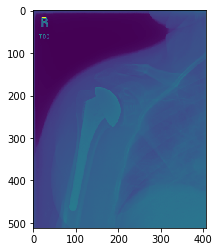

In [0]:
ori_img = plt.imread(image_path)
plt.imshow(ori_img)

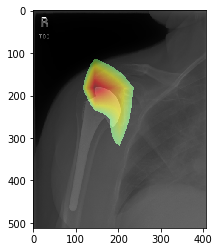

In [0]:
img = mpimg.imread(heatmap)
plt.imshow(img)

In [0]:
heatmap = get_cam(image_path1,valid_dfF,valid_dictF)

model_xr_humerus
[114]
1
2


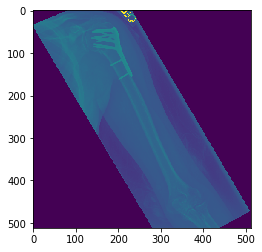

In [0]:
ori_img = plt.imread(image_path1)
plt.imshow(ori_img)

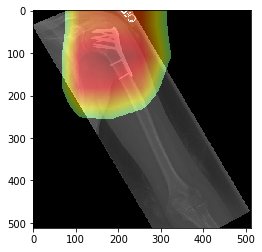

In [0]:
img = mpimg.imread(heatmap)
plt.imshow(img)

In [0]:
image_width = 224
image_height = 224
BASE_DIR = "data/"
DATA_DIR = "MURA-v1.1/"
valid_dir = BASE_DIR + DATA_DIR + "valid/XR_WRIST"
valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)
images_csv('valid', ["XR_WRIST"])
valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])
valid_dict = ImageArray(valid_df)
valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)


100%|██████████| 207/207 [00:01<00:00, 159.08it/s]
659it [00:03, 208.21it/s]


In [0]:
model = load_model("XR_WRIST_DenseNet201.h5")

In [0]:
image = Image.open("./data/MURA-v1.1/valid/XR_HUMERUS/patient11608/study1_positive/image2.png")
image_array = np.asarray(image.convert("RGB"))
image_array = image_array/255
image_array = resize(image_array, (224,224))
img_ori = cv2.imread(filename = os.path.join("./data/MURA-v1.1/valid/XR_HUMERUS/patient11608/study1_positive","image2.png"))
img_ori.shape

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(512, 384, 3)

In [0]:
img_ori = cv2.imread("./data/MURA-v1.1/valid/XR_WRIST/patient11196/study1_positive/image4.png", 1)

In [0]:
(height,weight,kuchBhi) = img_ori.shape
(height,weight)

(512, 186)

In [0]:
class_weights = model.layers[-1].get_weights()[0]

In [0]:
layer_name = "bn"
layer_dict = dict([(layer.name, layer) for layer in model.layers])
final_conv_layer = layer_dict[layer_name]
get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
[conv_outputs, predictions] = get_output([[valid_dict["images"][647]]])
conv_outputs = conv_outputs[0, :, :, :]
cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[:2])

In [0]:
for i,w in enumerate(class_weights[:,0]):
  cam += w*conv_outputs[:,:,i]
cam /= np.max(cam)

In [0]:
print(cam.shape)
cam = cv2.resize(cam, (weight,height))
print(cam.shape)

(7, 7)
(512, 186)


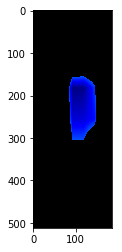

In [0]:
heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
heatmap[np.where(cam < 0.8) ] = 0
img = heatmap * 0.5 + img_ori
plt.imshow(heatmap)

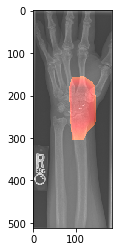

In [0]:
cv2.imwrite("heatmap.png", img)
img = mpimg.imread("heatmap.png")
plt.imshow(img)

###Ensemble

In [0]:
from keras.applications.densenet import DenseNet169, DenseNet201, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img, image
from keras.models import Sequential, Model, load_model, Input
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, average
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
import pandas as pd
from tqdm import tqdm
import os
import numpy as np
import random
from keras.optimizers import Adam
import keras.backend as K
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def ensemble(models, model_input):
    yModels=[model(model_input) for model in models] 
    yAvg=average(yModels) 
    modelEns = Model(inputs=model_input, outputs=yAvg,    name='ensemble')
    return modelEns

In [0]:
models=[]
model_xr_elbow = load_model("XR_ELBOW_DenseNet.h5")
model_xr_elbow.name = 'model_xr_elbow'
model_xr_finger = load_model("XR_FINGER_DenseNet201.h5")
model_xr_finger.name = 'model_xr_finger'
model_xr_forearm = load_model("XR_FOREARM_DenseNet.h5")
model_xr_forearm.name = 'model_xr_forearm'
model_xr_hand = load_model("XR_HAND_DenseNet201.h5")
model_xr_hand.name = 'model_xr_hand'
model_xr_shoulder = load_model("XR_SHOULDER_DenseNet201.h5")
model_xr_shoulder.name = 'model_xr_shoulder'
model_xr_wrist = load_model("XR_WRIST_DenseNet201.h5")
model_xr_wrist.name = 'model_xr_wrist'
model_xr_humerus = load_model("XR_HUMERUS_DenseNet201.h5")
model_xr_humerus.name = 'model_xr_humerus'

models.append(model_xr_elbow)
models.append(model_xr_finger)
models.append(model_xr_forearm)
models.append(model_xr_hand)
models.append(model_xr_shoulder)
models.append(model_xr_wrist)
models.append(model_xr_humerus)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [0]:
model_input = Input(shape=models[0].input_shape[1:]) # c*h*w
modelEns = ensemble(models, model_input)

In [0]:
#print(len(models))
modelEns.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
model_xr_elbow (Model)          (None, 1)            3229889     input_1[0][0]                    
__________________________________________________________________________________________________
model_xr_finger (Model)         (None, 1)            18323905    input_1[0][0]                    
__________________________________________________________________________________________________
model_xr_forearm (Model)        (None, 1)            3229889     input_1[0][0]                    
__________________________________________________________________________________________________
model_xr_h

In [0]:
modelEns.save("MURA_DenseNet201.h5")

In [0]:
modelEns = load_model("MURA_DenseNet201.h5")

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
def images_csv(datatype, study_types = ['XR_ELBOW','XR_FINGER','XR_FOREARM','XR_HAND','XR_HUMERUS','XR_SHOULDER','XR_WRIST']):
  """
    This function is to create a csv file containing path to images of x-rays and labels.
    @datatype ==> which part of data : train|valid
  """
  data = pd.DataFrame(columns=['path','label'])
  study_label = {'positive' : 1, 'negative' : 0}
  image_count = 0
  for study in study_types:
    DATA_DIR = './data/MURA-v1.1/%s/%s/' % (datatype,study)
    patient_list = list(os.walk(DATA_DIR))[0][1]  #list of all patients under that study
    for patient in tqdm(patient_list):
      for study_number in os.listdir(DATA_DIR + patient):
        label = study_label[study_number.split('_')[1]]
        path = DATA_DIR + patient + '/' + study_number + '/'
        for image in os.listdir(path):
          i_path = path + image
          data.loc[image_count] = [i_path,label]
          image_count+=1
#  print(data)
  data.to_csv("./data/" + datatype + "_images.csv", index=None, header=False)

In [0]:
#create Image Arrays Dictionary with normalized images
def ImageArray(dataframe):
  images = []
  labels = []
  for i, data in tqdm(dataframe.iterrows()):
    image = cv2.imread(data["path"])
    image = cv2.resize(image,(image_width,image_height))
    image = image[...,::-1].astype(np.float32)
    images.append(image)
    labels.append(data['label'])
  images = np.asarray(images).astype('float32')
  #NORMALIZATION
  mean = np.mean(images[:, :, :])
  std = np.std(images[:, :, :])
  images[:, :, :] = (images[:, :, :] - mean)/std
  labels = np.asarray(labels)
  return {'images': images, 'labels': labels}  

In [0]:
image_width, image_height = 224, 224
BASE_DATA_DIR = 'data/'
IMG_DATA_DIR = 'MURA-v1.1/'

In [0]:
valid_datagen = ImageDataGenerator(
    rotation_range = 30,
    #vertical_flip = True,
    horizontal_flip = True
)

images_csv('valid')

valid_df = pd.read_csv('data/valid_images.csv', names=['path','label'])

data_dict = {}
data_dict['valid'] = valid_df

valid_dict = ImageArray(valid_df)

valid_datagen.fit(valid_dict['images'],augment=True)

valid_generator = valid_datagen.flow(
    x = valid_dict['images'],
    y = valid_dict['labels'],
    batch_size = 1
)


100%|██████████| 207/207 [00:01<00:00, 142.73it/s]
3197it [00:12, 257.34it/s]


In [0]:
print(len(predictions))

3197


In [0]:
predictions = []
for i in range(len(valid_dict['images'])):
  predict = modelEns.predict_on_batch(valid_dict['images'][i:i+1])
  if(predict > 0.5):
    predictions+=[1]
  else:
    predictions+=[0]

In [0]:
error = np.sum(np.not_equal(predictions, valid_dict['labels'])) / valid_dict['labels'].shape[0]  
pred = predictions
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score, accuracy_score
print('Classification Report')
print(classification_report(valid_dict['labels'], pred, target_names=["0","1"]))

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1667
           1       0.72      0.68      0.70      1530

   micro avg       0.72      0.72      0.72      3197
   macro avg       0.72      0.72      0.72      3197
weighted avg       0.72      0.72      0.72      3197



In [0]:
accuracy_score(valid_dict['labels'], pred)

0.7216140131373162

In [0]:
cohen_kappa_score(valid_dict['labels'], pred)

0.44097256741246094

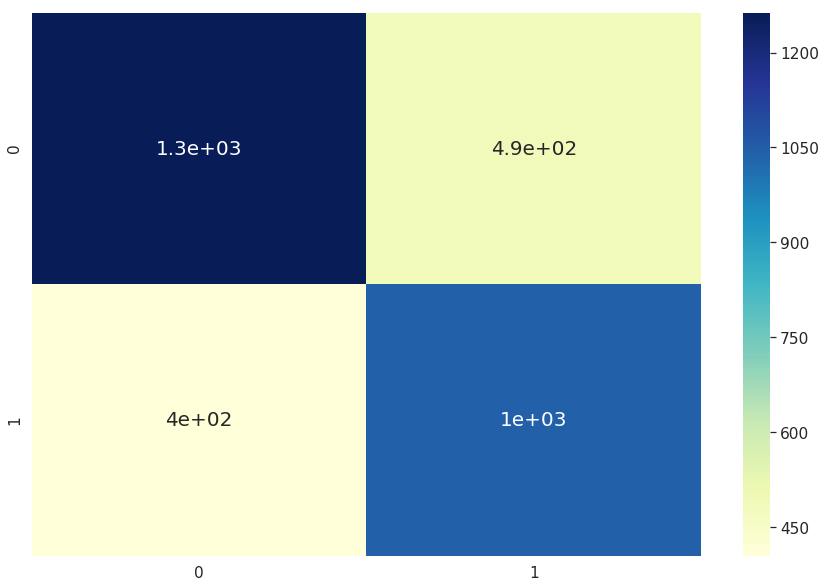

In [0]:
import seaborn as sn
cm = confusion_matrix( pred ,valid_dict['labels'])
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 20},cmap="YlGnBu") # font size
plt.show()

In [0]:
valid_dict['labels'].shape

(3197,)

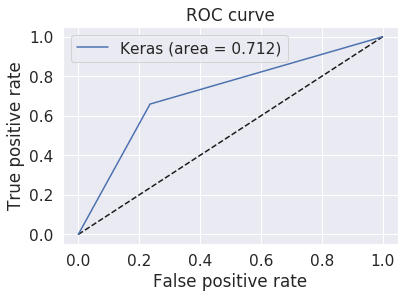

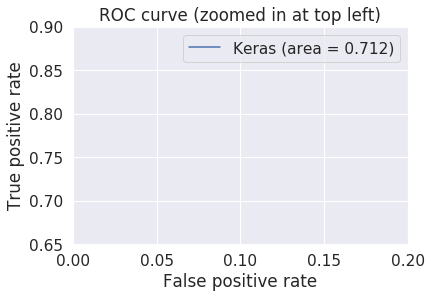

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(valid_dict['labels'], predictions)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2)
plt.xlim(0.0, 0.2)
plt.ylim(0.65, 0.9)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()